In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
from scipy.special import beta as beta_func
%matplotlib inline

In [194]:
def Doubletropolis(theta1,theta2,loop,jump):
    chain1 = []
    chain2 = []
    if theta1>1 or theta1<0:
        return 0
    if theta2>1 or theta2<0:
        return 0
    if jump<0:
        return 0 
    a=1
    b=1
    z1=22 
    N=100
    z2=50
    for i in range(0,loop): 
        thetaprop1 = theta1+norm.rvs(0,jump)
        thetaprop2 = theta2+norm.rvs(0,jump)
        if thetaprop1<0 or thetaprop1>1:    
            thetaprop1 = theta1     
        if thetaprop2<0 or thetaprop2>1:    
            thetaprop2 = theta2   
        prior = ((theta1**a)*(1-theta1)**(b))*((theta2**a)*(1-theta2)**b)
        #prior = beta.pdf(theta1,z1+a,N-z1+b)*beta.pdf(theta2,z2+a,N-z2+b)
        Lhood1 = (thetaprop1**z1)*(thetaprop1**(-N+z1))*(theta2**z2)*(theta2**(-N+z2))
        Lhood2 = (theta1**z1)*(theta1**(-N+z1))*(thetaprop2**z2)*(thetaprop2**(-N+z2))
        Lnaught = (theta1**a)*((1-theta1)**(b))*(theta2**a)*(1-theta2)**(b)
        post1 = prior*Lhood1
        post2 = prior*Lhood2
        denom = Lnaught*prior
        judge1 = min(post1/denom,1)
        J=np.random.uniform(0,1)
        if J<judge1:
            theta1=thetaprop1
        chain1.append(theta1)

        post2 = prior*Lhood2
        judge2 = min(post2/denom,1)
        K=np.random.uniform(0,1)
        if K<judge2:
            theta2=thetaprop2
        chain2.append(theta2)

        
    plt.plot(chain1,chain2)
    plt.title('Line plot of theta')   
    plt.show()
    plt.plot(chain1)
    plt.plot(chain2)   
    plt.xscale('log')
    plt.show()
    
    
#This attempt treated each proposed theta weight independently from the other coin and judged each
# proposal independently. Unfortunately, it doesn't appear to replicate correct behavior. The 
# posterior values don't appear to reflect the situation with 100 flips and either 22 or 50 heads. The 
# coins appear to be equally weighted, no matter what. 

d:\program files\python36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
d:\program files\python36\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars


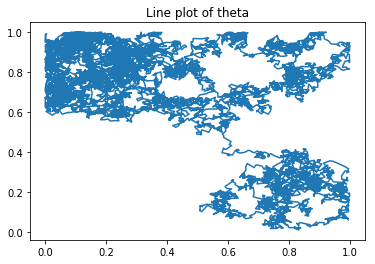

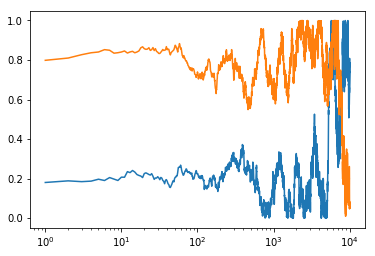

In [201]:
Doubletropolis(0.2,0.8,10000,.01)

In [ ]:
#This sucks. Trying again.

In [173]:
def Doubletropolistwo(theta1,theta2,loop,jump):
    chain1 = []
    chain2 = []
    test = []
    if theta1>1 or theta1<0:
        return 0
    if theta2>1 or theta2<0:
        return 0
    if jump<0:
        return 0 
    a=1
    b=1
    z1=22   
    N=100
    z2=50
    for i in range(0,loop): 
        thetaprop1 = theta1+norm.rvs(0,jump)
        thetaprop2 = theta2+norm.rvs(0,jump)
        if thetaprop1<0 or thetaprop1>1:    
            thetaprop1 = theta1     
        if thetaprop2<0 or thetaprop2>1:    
            thetaprop2 = theta2   
        prior = ((theta1**a)*(1-theta1)**(b))*((theta2**a)*(1-theta2)**b) #product of two beta dist.
        Lhood = ((thetaprop1**z1)*(1-thetaprop1)**(z1-N))*((thetaprop2**z2)*(1-thetaprop2)**(z2-N))
        Lnaught = (theta1**a)*((1-theta1)**(b))*(theta2**a)*(1-theta2)**(b)
        post = prior*Lhood
        denom = Lnaught*prior
        judge = min(post/denom,1)
        J=np.random.uniform(0,1)
        if J<judge:
            theta1=thetaprop1
            theta2=thetaprop2
        chain1.append(theta1)
        chain2.append(theta2)
        
        
    plt.plot(chain1,chain2)
    plt.title('Line plot of theta')   
    plt.show()
    plt.plot(chain1)
    plt.plot(chain2)
    plt.xscale('log')
    plt.show()
    
#The purpose of this attempt was to try to model a single likelihood, that both proposed weights were
# used simultaneously. This produced a very strange graph with dependent behavior between the weights
# of each coin. The 2-D plot of theta never roams into the bottom left territory. Maximizing one theta
# minimizes the other. This feels incorrect.

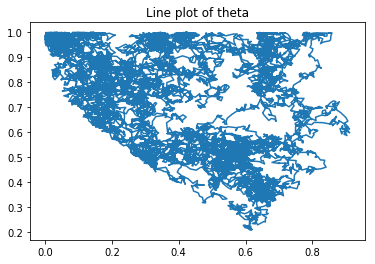

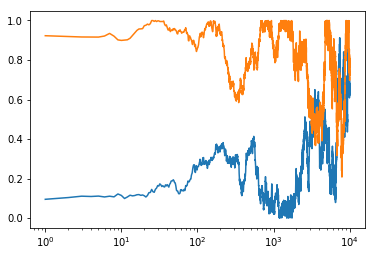

In [174]:
Doubletropolistwo(0.1,0.9,10000,.01)

In [ ]:
#This still sucks!

In [220]:
def Doubletropolis1(theta1,theta2,loop,jump):
    chain1 = []
    chain2 = []
    if theta1>1 or theta1<0:
        return 0
    if theta2>1 or theta2<0:
        return 0
    if jump<0:
        return 0 
    a=1
    b=1
    z1=22   
    N=100
    z2=50
    for i in range(0,loop): 
        
        thetaprop1= theta1+norm.rvs(0,jump) 
        num1 = beta.pdf(thetaprop1,z1+a,N-z1+b)*beta.pdf(theta2,z2+a,N-z2+b)      
        denom = beta.pdf(theta1,z1+a,N-z1+b)*beta.pdf(theta2,z2+a,N-z2+b)       
        rat1 = num1/denom                          
        paccept1=min(rat1,1)                       
        J=np.random.uniform(0,1)
        if J<paccept1:
            theta1=thetaprop1
        chain1.append(theta1)
        
        thetaprop2=theta2+norm.rvs(0,jump) 
        num2 = beta.pdf(thetaprop2,z2+a,N-z2+b)*beta.pdf(theta1,z1+a,N-z1+b)      
        rat2 = num2/denom
        paccept2=min(rat2,1)                       
        K=np.random.uniform(0,1)
        if K<paccept2:
            theta2=thetaprop2
        chain2.append(theta2)
        
    plt.plot(chain1,chain2)
    plt.title('Line plot of thetasud')   
    plt.show()
    plt.plot(chain1)
    plt.plot(chain2)
    plt.xscale('log')
    plt.title('chains')
    plt.show()
#This attempt intends to evaluate weights independently. For each set of coin tosses, the prior is 
# the same. I'm going to be honest when I say that I stumbled on something that appears to work.
# Setting up the probability of the proposed theta, and the probability of the prior, was especially
# confusing to me. I hope I captured the two-dimensional behavior correctly. The two coins should
# share the same prior, which I've called "denom" in this definition. The numerators are the
# likelihoods of a coin's proposed theta multiplied by the likelihood of the other coin's prior theta.
# There appears to be slight cancellation between terms in each numerator and denominator, reducing 
# rat1 and rat2, but in such a way that this definition is not terribly redundant. 

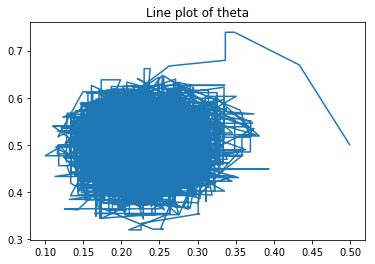

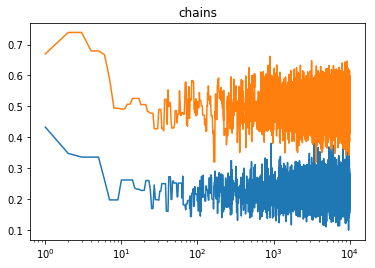

In [227]:
Doubletropolis1(0.5,0.5,10000,0.1)

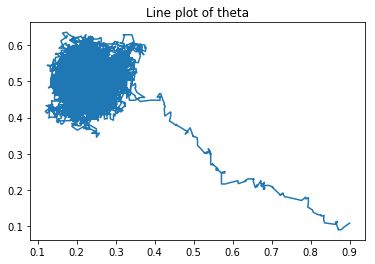

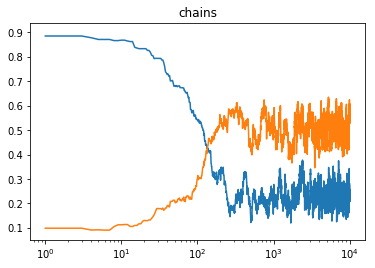

In [228]:
Doubletropolis1(0.9,0.1,10000,0.01)

In [ ]:
#The burn-in is clear using different seed values for the weights and different jump sizes. 
# Theta one is tending toward 0.2, while theta two is staying around 0.5. This is supported by the
# amount of heads for each coin out of 100 flips.